In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [2]:
numpy_saved_dir_path = "/content/drive/MyDrive/Gem Classification - Research/image_based_transfer_learning/numpy"

train_X = np.load(os.path.join(numpy_saved_dir_path, "train_X.npy"))
test_X = np.load(os.path.join(numpy_saved_dir_path, "test_X.npy"))
train_y = np.load(os.path.join(numpy_saved_dir_path, "train_y.npy"))
test_y = np.load(os.path.join(numpy_saved_dir_path, "test_y.npy"))

In [3]:
base_model = keras.applications.InceptionV3 (
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False
)

87910968/87910968 [==============================] - 3s 0us/step


In [4]:
base_model.trainable = False

In [5]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(8)(x)
model = keras.Model(inputs, outputs)

In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.CategoricalAccuracy()]
)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 8)                 16392     
                                                                 
Total params: 21,819,176
Trainable params: 16,392
Non-trainable params: 21,802,784
_________________________________________________________________


In [7]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2
)

In [8]:
model_save_dir_path = "/content/drive/MyDrive/Gem Classification - Research/image_based_transfer_learning/models/InceptionV3"

best_loss_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(model_save_dir_path, "InceptionV3-best_loss_model.h5"),
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(model_save_dir_path, "InceptionV3-best_val_loss_model.h5"),
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [9]:
bs = 32

history = model.fit(
    datagen.flow(train_X, train_y, batch_size=bs, shuffle=True),
    steps_per_epoch=train_X.shape[0] // bs,
    epochs=10,
    validation_data=(test_X, test_y),
    validation_steps=test_X.shape[0],
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint],
    verbose=1
)

Epoch 1/10
22/22 [==============================] - 129s 6s/step - loss: 1.6645 - categorical_accuracy: 0.3577 - val_loss: 1.1254 - val_categorical_accuracy: 0.5976
Epoch 2/10
22/22 [==============================] - 112s 5s/step - loss: 1.0343 - categorical_accuracy: 0.6195 - val_loss: 0.8712 - val_categorical_accuracy: 0.6951
Epoch 3/10
22/22 [==============================] - 123s 6s/step - loss: 0.8613 - categorical_accuracy: 0.6881 - val_loss: 0.7767 - val_categorical_accuracy: 0.7683
Epoch 4/10
22/22 [==============================] - 109s 5s/step - loss: 0.7486 - categorical_accuracy: 0.7325 - val_loss: 0.7264 - val_categorical_accuracy: 0.7805
Epoch 5/10
22/22 [==============================] - 109s 5s/step - loss: 0.6668 - categorical_accuracy: 0.7768 - val_loss: 0.6638 - val_categorical_accuracy: 0.7805
Epoch 6/10
22/22 [==============================] - 115s 5s/step - loss: 0.6102 - categorical_accuracy: 0.7740 - val_loss: 0.7206 - val_categorical_accuracy: 0.7561
Epoch 7/10

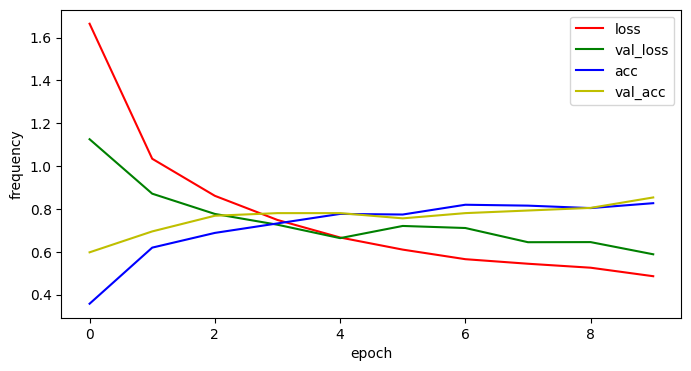

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'], 'g-', label='val_loss')
plt.plot(history.history['categorical_accuracy'], 'b-', label='acc')
plt.plot(history.history['val_categorical_accuracy'], 'y-', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('frequency')
plt.legend()
plt.show()